# Verification of Results
In order to evaluate the validity and accuracy of the program's results, several test cases were compared against the ISO 9613-2 implementation conducted by {cite:t}`dbmap`. The software was tested using identical test cases created on both [dBmap.net](http://dBmap.net) and in a Jupyter Notebook, demonstrating the level of attenuation in various environments. This comparison allowed for an assessment of the program's performance and its adherence to the ISO standard.

In [1]:
import os
from pathlib import Path
import sys
sys.path.append(str(Path(os.getcwd()).parent.parent))
from src.utils import ElevationHandlerTest, solve_noise_map
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import RectBivariateSpline
import pandas as pd

## Simulation Setup
The simulations utilize a custom class called `ElevationHandlerTest` designed to manage elevation data instead of deriving it from the SRTM30 source. In these simulations, the terrain is considered flat, except for barrier evaluation. The scenario involves a point source positioned at an elevation of 1 meter and a receiver at ground level (0 meters). The environmental conditions are standardized with a temperature of 15°C, relative humidity at 70%. The simulations focus on a specific octave band (1000 Hz) with a Sound Pressure Level (SPL) set to 100 dB(A). The point source is positioned at x = 20 and a receiver located at x = 100.

### Flat ground with ground factor of 0
<img src="../../jupyter-book/images/ground_factor0.png" alt="ground_factor0" width="1000px" class="bg-primary"/>

*Fig 1: Simulation with flat ground and a ground factor of 0 ([Simulation Source](https://dbmap.net/803qv)).*

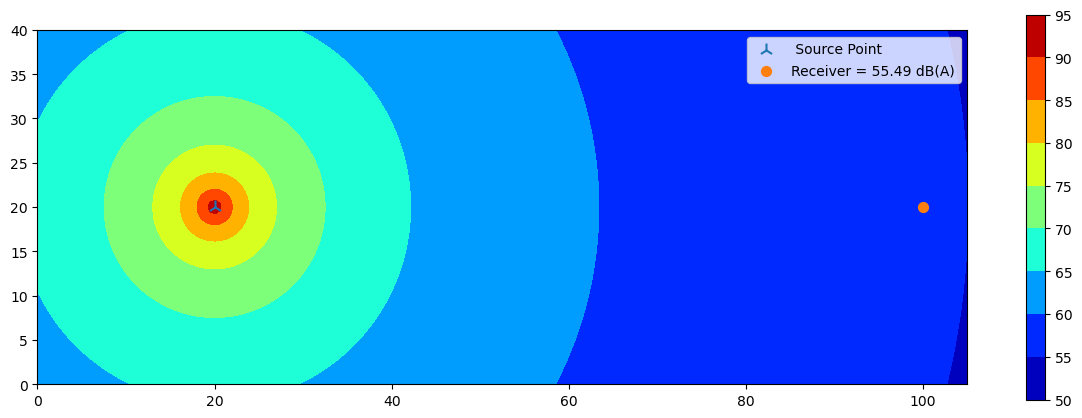

In [2]:
point_source_data = pd.DataFrame(data=[
    {"latitude": 20,
        "longitude": 20,
        "h": 1,
        "octave_band": {"1000": 100}}])

map_shape = [80, 210]
map_boundaries = [0, 105, 0, 40]
map_array = np.zeros(map_shape)
elevation_handler = ElevationHandlerTest(map_array, map_boundaries)
LDW = solve_noise_map(elevation_handler, point_source_data, ground_factor = 0)

receiver = [100, 20]

interp_spline = RectBivariateSpline(elevation_handler.lat_range, elevation_handler.long_range, LDW)
receiver_value = interp_spline(receiver[1], receiver[0]).max()

fig, ax = plt.subplots(figsize = (15,5))
cl = ax.contourf(elevation_handler.long_range, elevation_handler.lat_range, LDW, cmap = "jet")
plt.colorbar(cl, ax = ax)
ax.set(aspect="equal")
ax.scatter(point_source_data.longitude, point_source_data.latitude, marker = "2", s = 100, label = " Source Point")
ax.scatter(*receiver, marker = "o", s = 50, label = f"Receiver = {receiver_value:.2f} dB(A)")
plt.tight_layout
plt.legend()
plt.show()

### Flat ground with ground factor of 0.5

<img src="../../jupyter-book/images/ground_factor05.png" alt="ground_factor0" width="1000px" class="bg-primary"/>

*Fig 2: Simulation with flat ground and a ground factor of 0.5 ([Simulation Source](https://dbmap.net/v38b2/)).*

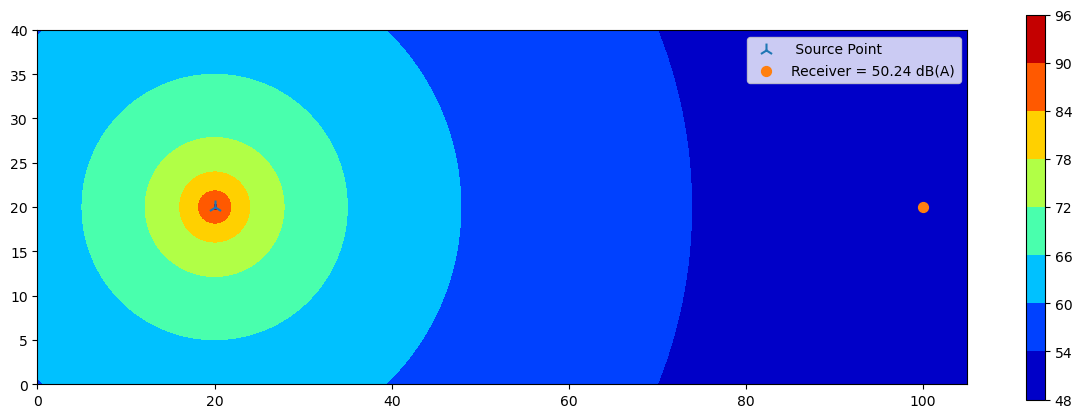

In [3]:
point_source_data = pd.DataFrame(data=[
    {"latitude": 20,
        "longitude": 20,
        "h": 1,
        "octave_band": {"1000": 100}}])

map_shape = [80, 210]
map_boundaries = [0, 105, 0, 40]
map_array = np.zeros(map_shape)
elevation_handler = ElevationHandlerTest(map_array, map_boundaries)
LDW = solve_noise_map(elevation_handler, point_source_data, ground_factor = 0.5)

receiver = [100, 20]
interp_spline = RectBivariateSpline(elevation_handler.lat_range, elevation_handler.long_range, LDW)
receiver_value = interp_spline(receiver[1], receiver[0]).max()

fig, ax = plt.subplots(figsize = (15,5))
cl = ax.contourf(elevation_handler.long_range, elevation_handler.lat_range, LDW, cmap = "jet")
plt.colorbar(cl, ax = ax)
ax.set(aspect="equal")
ax.scatter(point_source_data.longitude, point_source_data.latitude, marker = "2", s = 100, label = " Source Point")
ax.scatter(*receiver, marker = "o", s = 50, label = f"Receiver = {receiver_value:.2f} dB(A)")
plt.tight_layout
plt.legend()
plt.show()

### Flat ground with ground factor of 1

<img src="../../jupyter-book/images/ground_factor1.png" alt="ground_factor1" width="1000px" class="bg-primary"/>

*Fig 3: Simulation with flat ground and a ground factor of 1 ([Simulation Source](https://dbmap.net/267yt)).*

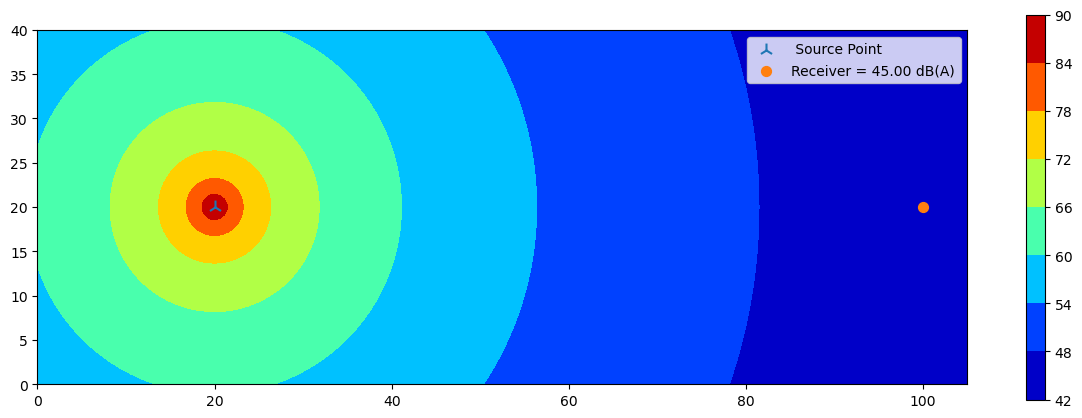

In [4]:
point_source_data = pd.DataFrame(data=[
    {"latitude": 20,
        "longitude": 20,
        "h": 1,
        "octave_band": {"1000": 100}}])

map_shape = [80, 210]
map_boundaries = [0, 105, 0, 40]
map_array = np.zeros(map_shape)
elevation_handler = ElevationHandlerTest(map_array, map_boundaries)
LDW = solve_noise_map(elevation_handler, point_source_data, ground_factor = 1)

receiver = [100, 20]
interp_spline = RectBivariateSpline(elevation_handler.lat_range, elevation_handler.long_range, LDW)
receiver_value = interp_spline(receiver[1], receiver[0]).max()

fig, ax = plt.subplots(figsize = (15,5))
cl = ax.contourf(elevation_handler.long_range, elevation_handler.lat_range, LDW, cmap = "jet")
plt.colorbar(cl, ax = ax)
ax.set(aspect="equal")
ax.scatter(point_source_data.longitude, point_source_data.latitude, marker = "2", s = 100, label = " Source Point")
ax.scatter(*receiver, marker = "o", s = 50, label = f"Receiver = {receiver_value:.2f} dB(A)")
plt.tight_layout
plt.legend()
plt.show()

### Simulation with a single barrier
<img src="../../jupyter-book/images/single_barrier.png" alt="single_barrier" width="1000px" class="bg-primary"/>

*Fig 4: Simulation with a single barrier and a ground factor of 0 ([Simulation Source](https://dbmap.net/k7e24)).*

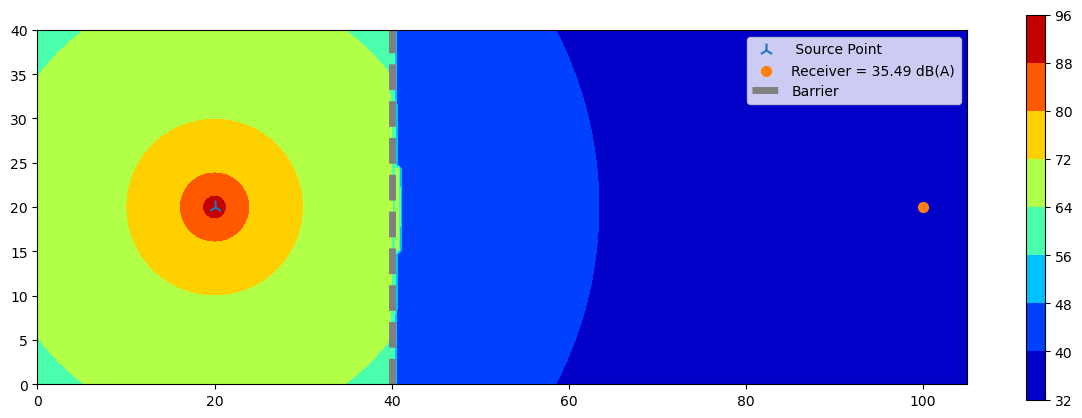

In [5]:
point_source_data = pd.DataFrame(data=[
    {"latitude": 20,
        "longitude": 20,
        "h": 1,
        "octave_band": {"1000": 100}}])

map_shape = [80, 210]
map_boundaries = [0, 105, 0, 40]
map_array = np.zeros(map_shape)
map_array[:,80] = 20 # add barrier
elevation_handler = ElevationHandlerTest(map_array, map_boundaries)
LDW = solve_noise_map(elevation_handler, point_source_data, ground_factor = 0)

receiver = [100, 20]
interp_spline = RectBivariateSpline(elevation_handler.lat_range, elevation_handler.long_range, LDW)
receiver_value = interp_spline(receiver[1], receiver[0]).max()

fig, ax = plt.subplots(figsize = (15,5))
cl = ax.contourf(elevation_handler.long_range, elevation_handler.lat_range, LDW, cmap = "jet")
plt.colorbar(cl, ax = ax)
ax.set(aspect="equal")
ax.scatter(point_source_data.longitude, point_source_data.latitude, marker = "2", s = 100, label = " Source Point")
ax.scatter(*receiver, marker = "o", s = 50, label = f"Receiver = {receiver_value:.2f} dB(A)")
ax.axvline(40, label = "Barrier", linewidth = 5, color = "grey", linestyle = "dashed")
plt.tight_layout
plt.legend()
plt.show()

As seen in the above figures, the calculations from both [dBmap.net](http://dBmap.net) and the program shows good agreement. Both simulations adhere to the ISO 9613-2 limits, which prescribe an attenuation of 20 dB(A) for single diffraction and 25 dB(A) for multiple diffraction. In this specific scenario with a single barrier lacking thickness, only one diffraction occurs, and the barrier's attenuation is accordingly capped at 20 dB(A).

### Double Barrier
<img src="../../jupyter-book/images/double_barrier.png" alt="single_barrier" width="1000px" class="bg-primary"/>

*Fig 5: Simulation with double barriers and a ground factor of 0 ([Simulation Source](https://dbmap.net/wcga6)).*

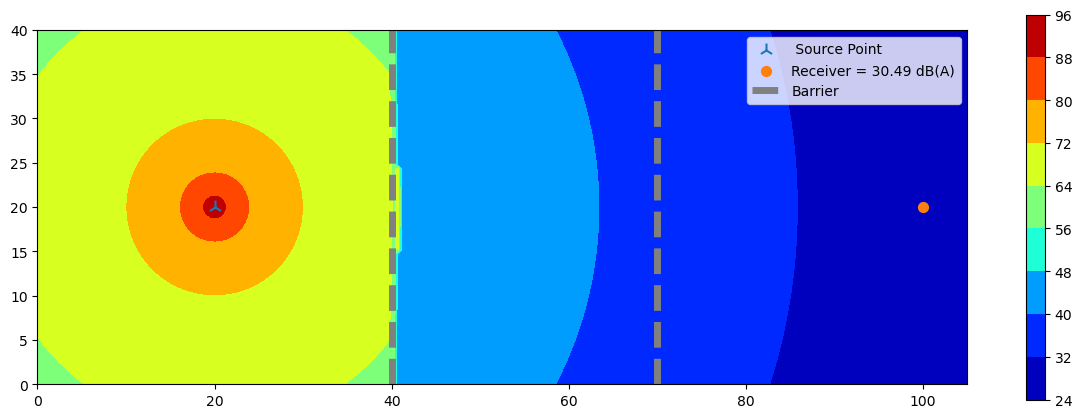

In [6]:
point_source_data = pd.DataFrame(data=[
    {"latitude": 20,
        "longitude": 20,
        "h": 1,
        "octave_band": {"1000": 100}}])

map_shape = [80, 210]
map_boundaries = [0, 105, 0, 40]
map_array = np.zeros(map_shape)
map_array[:,80] = 20 # add barrier
map_array[:,140] = 20 # add barrier 2
elevation_handler = ElevationHandlerTest(map_array, map_boundaries)
LDW = solve_noise_map(elevation_handler, point_source_data, ground_factor = 0)

receiver = [100, 20]
interp_spline = RectBivariateSpline(elevation_handler.lat_range, elevation_handler.long_range, LDW)
receiver_value = interp_spline(receiver[1], receiver[0]).max()

fig, ax = plt.subplots(figsize = (15,5))
cl = ax.contourf(elevation_handler.long_range, elevation_handler.lat_range, LDW, cmap = "jet")
plt.colorbar(cl, ax = ax)
ax.set(aspect="equal")
ax.scatter(point_source_data.longitude, point_source_data.latitude, marker = "2", s = 100, label = " Source Point")
ax.scatter(*receiver, marker = "o", s = 50, label = f"Receiver = {receiver_value:.2f} dB(A)")
ax.axvline(40, label = "Barrier", linewidth = 5, color = "grey", linestyle = "dashed")
ax.axvline(70, linewidth = 5, color = "grey", linestyle = "dashed")
plt.tight_layout
plt.legend()
plt.show()


## Comment on the results
As it can be seen from the figures above, the alignment between the industrial ISO 9613-2 standard implementation and the implementation in this Jupyter Notebook is nearly flawless. The minor discrepancy between the two codes can likely be attributed to the Jupyter Notebook's use of discrete steps to depict the environment, introducing small rounding errors when elements (such as the source or receiver) are not precisely centered within the cells. Nevertheless, the observed error generally remains below 1% of that found in the industrial code.